## PyQGIS no Jupyter

O QGIS permite ser utilizado a partir do Python, de acordo com a API [PyQGIS](https://docs.qgis.org/testing/en/docs/pyqgis_developer_cookbook/).

Neste notebook faz-se um pequeno exemplo dessa ligação, para se conseguir ter mapas num notebook, que são produzidos pelo QGIS. No fundo vamos ter um QGIS a correr em offline e que nos entrega o mapa como uma sequência de bytes.

Neste notebook mostra-se a aplicação de um outro estilos guardado num arquivo `*.qml`.

### Ligação ao QGIS (standard)
Os paths específicos depende do sistema operativo e da forma como o QGIS foi instalado.

No caso geral, bastaria a seguinte inicialização:
```python
from osgeo import ogr
from qgis.core import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
```

Em Windows, a solução passa por instalar e arrancar o Jupyter no **ambiente Python do QGIS**. Pode-se fazer isso alterando a sccript `python-qgis.bat` em `OSGeo4W64\bin\`, acrescentando no fim:
```
pip install notebook
jupyter notebook --notebook-dir <diretoria do trabalho>
```

### Ligação ao QGIS (não standard)
Com o QGIS compilado localmente e instalado em `/usr/local`, como no caso seguinte, é preciso ajustar os caminhos para as bibliotecas Python. O exemplo seguinte é específico a um determinado ambiente, mas serve de inspiração para outros ambientes não standard, em que seja preciso ajustar caminhos.

In [1]:
import os
import sys
from osgeo import ogr
# os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("/usr/local", True) 
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		
Prefix:		/usr/local
Plugin Path:		/usr/local/lib/qgis/plugins
Package Data Path:	/usr/local/share/qgis
Active Theme Name:	
Active Theme Path:	/usr/local/share/qgis/resources/themes//icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/usr/local/share/qgis/svg/
		/home/jgr/.local/share/profiles/default/svg/
User DB Path:	/usr/local/share/qgis/resources/qgis.db
Auth DB Path:	/home/jgr/.local/share/profiles/default/qgis-auth.db



#### Carregar uma camada a partir de uma tabela guardada num geopackage
Um geopackage pode conter vários layers. Associado ao layer pode estar associado um estilo predefinido, como no caso seguinte.

No exemplo, adiciona-se ao QGIS (que ainda não tem nenhuma camada), a camada `concelho`.

In [2]:
covid_gpkg = "../covid-pt-latest.gpkg" + "|layername=concelho"
concelho = QgsVectorLayer(covid_gpkg, "Concelhos", "ogr")
if not concelho.isValid():
    print("Layer failed to load!")
else:
    QgsProject.instance().addMapLayer(concelho)
    print("Layer loaded")

Layer loaded


Geração do primeiro mapa.

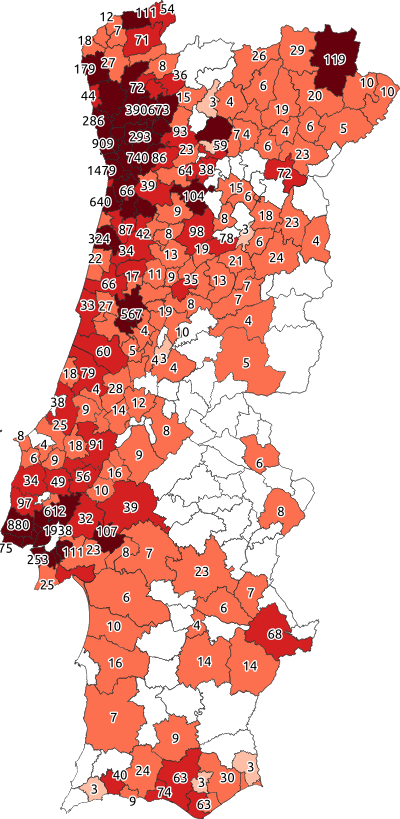

In [4]:
from IPython.display import Image

xt = concelho.extent()
# print(xt)
width  = 400
height = int(width*xt.height()/xt.width())

options = QgsMapSettings()
options.setLayers([concelho])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

Confirmar a pasta atual:

In [5]:
os.getcwd()

'/mnt/bonn/Aulas/19202S/MIEBIOM/COVID-19/Repo/Jupyter'

Utilizar um outro estilo preparado previamente e guardado em `estilo2.qml`.

In [6]:
estilo = os.path.join(os.getcwd(), "estilos/estilo2.qml")
res = concelho.loadNamedStyle( estilo, True)
res

('', True)

<QgsRectangle: -119191.40750000000116415 -300404.80399999901419505, 162129.08110000001033768 276083.7674000000115484>
Gerar mapa com 400 por 819


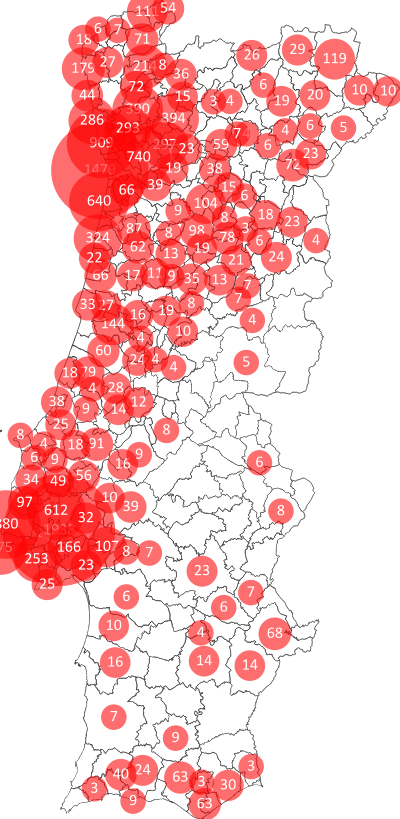

In [7]:
xt = concelho.extent()
print(xt)
width  = 400
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([concelho])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

imgbuf2 = QBuffer()
imgbuf2.open( QIODevice.ReadWrite )
image.save( imgbuf2,"PNG" )
Image( imgbuf2.data() )